In [1]:
# %load near-field_calculation-test.py
#!/usr/bin/env python

# In[1]:
import os
import os.path

import numpy as np;
import torch as T;
import copy ;
import time;
import matplotlib.pyplot as plt;

import PyccatPO;
from PyccatPO import field_calculation, field_calculation_far

import Kirchhoffpy;
from Kirchhoffpy.Spheical_field import spheical_grid;
from Kirchhoffpy.coordinate_operations import Coord;

from Kirchhoffpy.coordinate_operations import Transform_local2global as local2global;
from Kirchhoffpy.coordinate_operations import Transform_global2local as global2local;
from Kirchhoffpy.coordinate_operations import cartesian_to_spherical as cart2spher;
from Kirchhoffpy.Feedpy import CO,dotproduct;

Theta_0=0.927295218001612;
angle_s=[0,np.pi,0];         
D_s=[0,0,0];
angle_fimag=[-Theta_0,0,0]
angle_m1=[-Theta_0/2,0,0]  


frequency=296;
N_mirror2 = 201
N_mirror1 = 201
text = ''
with open('CCAT_model/input.txt','r') as f:
    for line in f:
        if line.split(',')[0] in ['Nx_M2','Ny_M2']:
            text = text + line.split(',')[0] + ', ' +str(N_mirror2)+'\n'
        elif line.split(',')[0] in ['Nx_M1','Ny_M1']:
            text = text + line.split(',')[0] + ', ' +str(N_mirror1)+'\n'
        else:
            text = text + line
with open('CCAT_model/input.txt','w') as f:
    f.writelines(text)

outputfolder = 'output/'+str(frequency)+'GHz/far_field/'+str(N_mirror2)+'_'+str(N_mirror1)+'/'
if os.path.isdir(outputfolder):
    print("Exists")
else:
    print("Doesn't exists")
    os.mkdir(outputfolder)

# define the parameters input files
inputfile='CCAT_model';
sourcefile='beam'
defocus=[0,0,0];

ad_m2=np.zeros(5*69);
ad_m1=np.zeros((5,77));
Ns=501
print(Ns)
source_field=spheical_grid(-0.01/2,0.01/2,-0.01/2,0.01/2,Ns,Ns,FIELD='far',Type='uv')
source0=np.concatenate((source_field.x,source_field.y,source_field.z)).reshape(3,-1).T
source=Coord();
#source0=np.genfromtxt(sourcefile+'/on-axis.txt',delimiter=',');
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2];
Field_fimag_E,Field_fimag_H,Field_m1_E,Field_m1_H,Field_s_E,Field_s_H=field_calculation_far(inputfile,source,defocus,ad_m2,ad_m1);
Ns=int(np.sqrt(source.x.size));









Exists
501
2
3
4
time used: 68176.67209715198


/tmp/ipykernel_232694/2954809377.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(source.x.reshape(Ns,Ns),source.y.reshape(Ns,Ns),20*np.log10(np.abs(F_co.reshape(Ns,Ns))),cmap=cmap,vmax=vmax,vmin=vmax-80);
/tmp/ipykernel_232694/2954809377.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(source.x.reshape(Ns,Ns),source.y.reshape(Ns,Ns),20*np.log10(np.abs(F_cx.reshape(Ns,Ns))),cmap=cmap,vmax=vmax-60,vmin=vmax-100);


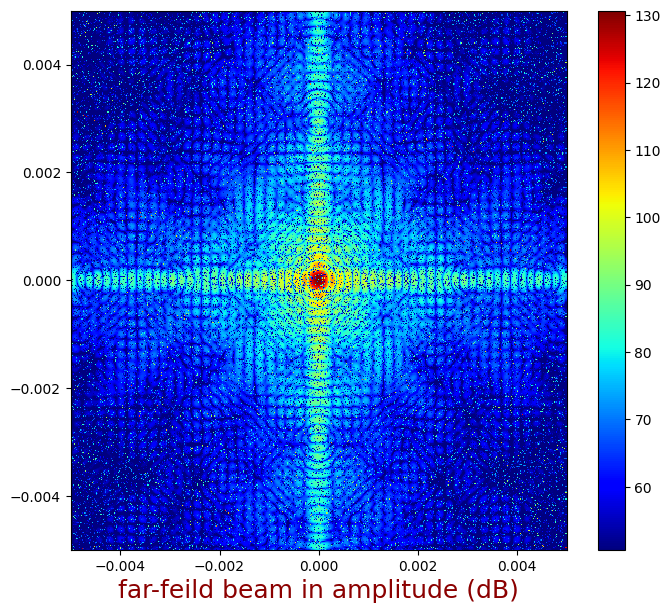

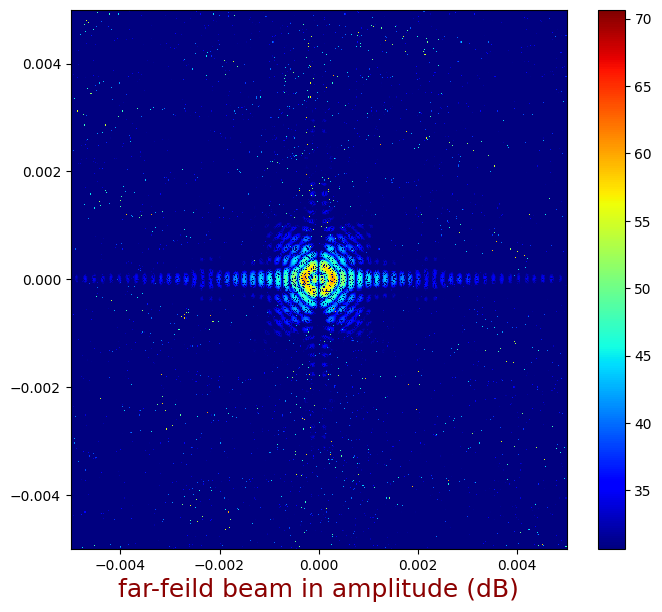

In [2]:
# calculate the co cx crho vectorsl;
r,theta,phi=cart2spher(source.x,source.y,source.z)
co,cx,crho=CO(theta,phi);

Field_s_E.N=[];
Field_s_E1=global2local(angle_s,[0,0,0],Field_s_E)

F_co=dotproduct(Field_s_E1,co)
F_cx=dotproduct(Field_s_E1,cx)

Field_fimag_E.N =[]
Field_fimag_E1 = global2local(angle_fimag,[0,0,0],Field_fimag_E)

Field_m1_E.N =[]
Field_m1_E1 = global2local(angle_m1,[0,0,0],Field_m1_E)


#F_crho=dotproduct(Field_s_E1,crho)

#Sx=(F_co.real+1j*F_co.imag).reshape(Ns,Ns);
#Sy=(F_cx.real+1j*F_cx.imag).reshape(Ns,Ns);
#Sz=(F_crho.real+1j*F_crho.imag).reshape(Ns,Ns);


# In[9]:

vmax = 20*np.log10(np.abs(F_co.reshape(Ns,Ns)).max())
cmap='jet'
fig=plt.figure(figsize=(8,7));
plt.pcolor(source.x.reshape(Ns,Ns),source.y.reshape(Ns,Ns),20*np.log10(np.abs(F_co.reshape(Ns,Ns))),cmap=cmap,vmax=vmax,vmin=vmax-80);
plt.xlabel('far-feild beam in amplitude (dB)',fontsize=18,color='darkred')
plt.colorbar();
plt.savefig(outputfolder +'far_field_beam.png')

fig=plt.figure(figsize=(8,7));
plt.pcolor(source.x.reshape(Ns,Ns),source.y.reshape(Ns,Ns),20*np.log10(np.abs(F_cx.reshape(Ns,Ns))),cmap=cmap,vmax=vmax-60,vmin=vmax-100);
plt.xlabel('far-feild beam in amplitude (dB)',fontsize=18,color='darkred')
plt.colorbar();
plt.savefig(outputfolder +'far_field_beam_y.png')


Source=np.concatenate((F_co.real,F_co.imag,F_cx.real,F_cx.imag)).reshape(4,-1).T
# saveing data;

np.savetxt(outputfolder +'source_field.txt',Source,delimiter=',');

Field_IF=np.concatenate((Field_fimag_E1.x.real,Field_fimag_E1.x.imag,Field_fimag_E1.y.real,Field_fimag_E1.y.imag,Field_fimag_E1.z.real,Field_fimag_E1.z.imag)).reshape(6,-1).T
np.savetxt(outputfolder +'IF_field.txt',Field_IF,delimiter=',');

Field_M1=np.concatenate((Field_m1_E1.x.real,Field_m1_E1.x.imag,Field_m1_E1.y.real,Field_m1_E1.y.imag,Field_m1_E1.z.real,Field_m1_E1.z.imag)).reshape(6,-1).T
np.savetxt(outputfolder +'M1_field.txt',Field_M1,delimiter=',');

